In [1]:
import pandas as pd
import numpy as np

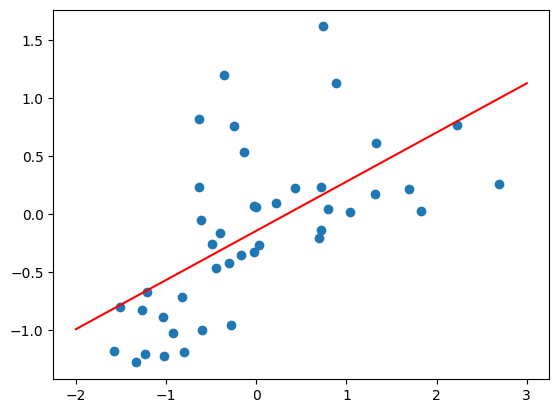

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

data = pd.read_csv('stuff.csv')

X = data.loc[:,["BMI"]].values
y = data.loc[:, "HOMA-IR"].values


a, b = np.polyfit(X.flatten(), y, 1)
plt.scatter(X, y)

x_vals = np.array((-2,3))
y_vals = b + a * x_vals
plt.plot(x_vals, y_vals, '-', color='red')

In [3]:
data.corr()

,Age,Gender,BMI,Body weight,Height,HOMA-IR
Age,1.000000,-0.132226,0.001036,-0.092696,-0.167205,0.079607
Gender,-0.132226,1.000000,-0.192220,0.018738,0.453670,-0.160827
BMI,0.001036,-0.192220,1.000000,0.883373,-0.397177,0.472002
Body weight,-0.092696,0.018738,0.883373,1.000000,0.071888,0.285412
Height,-0.167205,0.453670,-0.397177,0.071888,1.000000,-0.463972
HOMA-IR,0.079607,-0.160827,0.472002,0.285412,-0.463972,1.000000


In [4]:
# Calculate the r-value
numerator = np.sum((X.flatten() - np.mean(X)) * (y - np.mean(y)))
denominator = np.sqrt(np.sum((X.flatten() - np.mean(X))**2) * np.sum((y - np.mean(y))**2))
r_value = numerator / denominator

print("R-value:", r_value)

R-value: 0.472001635395612
